In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

import missingno as msno

In [115]:
Data = pd.read_csv('creditcard.csv')

1) PRELIMINARY EDA

In [116]:
Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [117]:
Data.info()
Data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [118]:
Data.describe(include='number')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


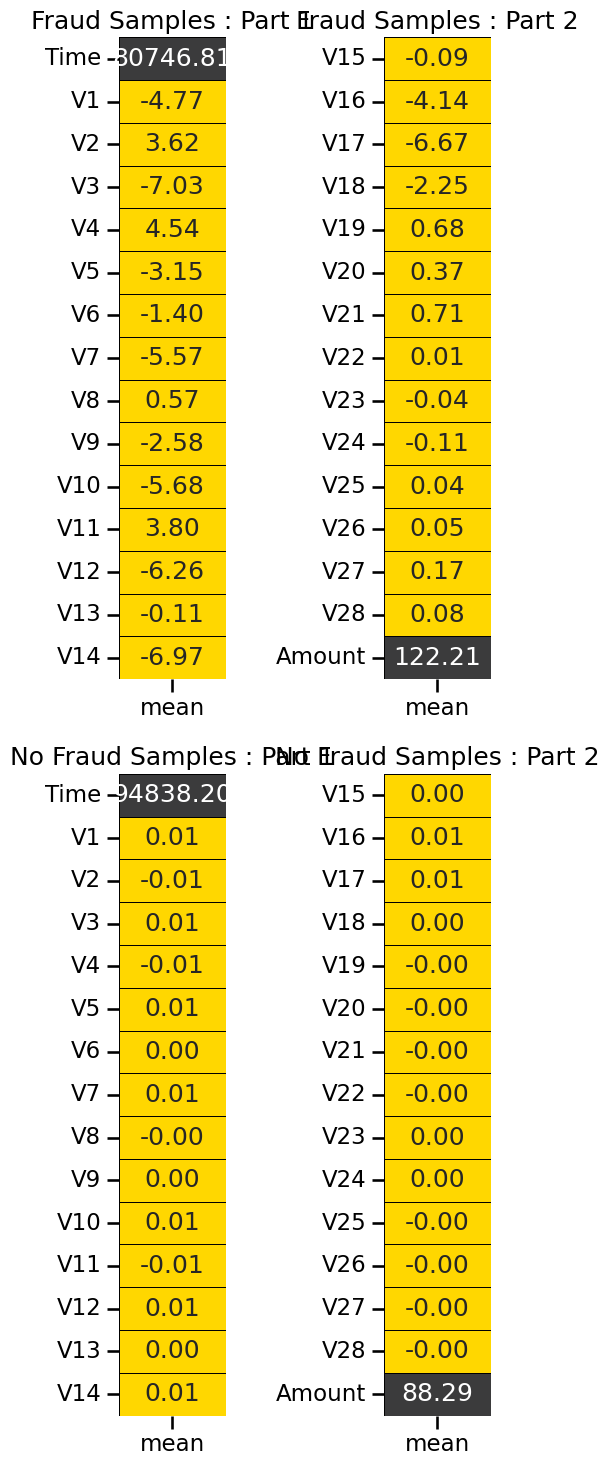

In [119]:
fraud = Data[Data['Class'] == 1].describe().T
nofraud = Data[Data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

         Value_counts  Percent
Genuine        284315     99.8
Fraud             492      0.2


[Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')]

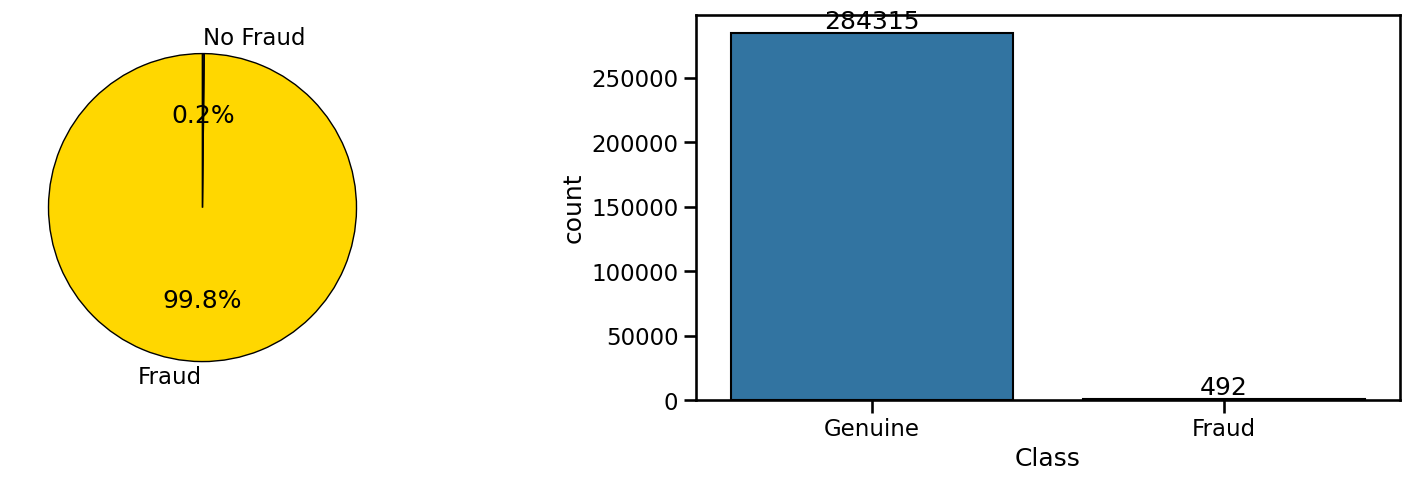

In [120]:
valuecounts = Data['Class'].value_counts()
percentage = round(valuecounts*100/valuecounts.sum(),1)
df = pd.DataFrame({'Value_counts':valuecounts,'Percent':percentage})
df.rename(index = {0:'Genuine',1:'Fraud'},inplace = True)
print(df)

fraud = len(Data[Data['Class'] == 1]) / len(Data) * 100
nofraud = len(Data[Data['Class'] == 0]) / len(Data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(data = Data,
                   x='Class',
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Genuine','Fraud'])

2) FEATURE ENGINEERING PRELIMINARY EDA

In [121]:
import datetime
import math
# Converting time from second to hour
Data['Time'] = Data['Time'].apply(lambda sec : (sec/3600))

# Calculating hour of the day
Data['Hour'] = Data['Time']%24   # 2 days of data
Data['Hour'] = Data['Hour'].apply(lambda x : math.floor(x))

# Calculating First and Second day
Data['Day'] = Data['Time']/24   # 2 days of data
Data['Day'] = Data['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

Data[['Time','Hour','Day','Amount','Class']]

,Time,Hour,Day,Amount,Class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [122]:
Data[(Data['Class'] == 0)]['Day']

0         1
1         1
2         1
3         1
4         1
         ..
284802    2
284803    2
284804    2
284805    2
284806    2
Name: Day, Length: 284315, dtype: int64

<ipython-input-123-6bfd18925a68>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[Data['Class']==0]['Time'].values , color = 'green' , ax = axs[0])
<ipython-input-123-6bfd18925a68>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[Data['Class']==1]['Time'].values , color = 'red' ,ax = a

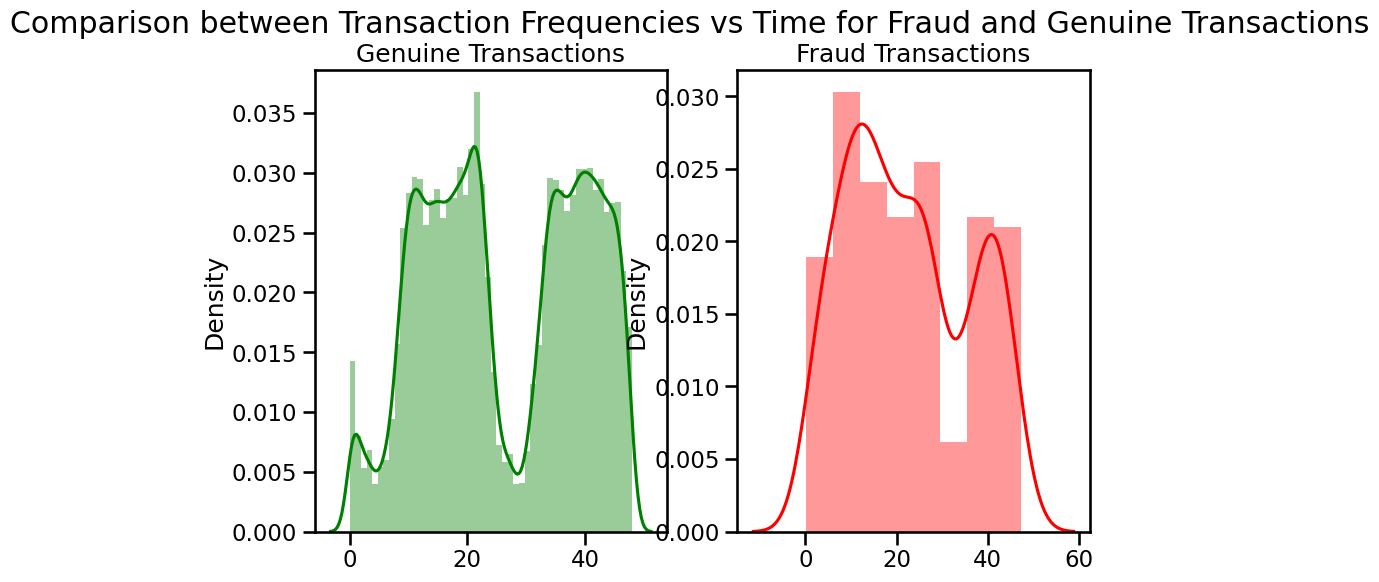

In [123]:
# Time plots
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10,6))

sns.distplot(Data[Data['Class']==0]['Time'].values , color = 'green' , ax = axs[0])
axs[0].set_title('Genuine Transactions')

sns.distplot(Data[Data['Class']==1]['Time'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

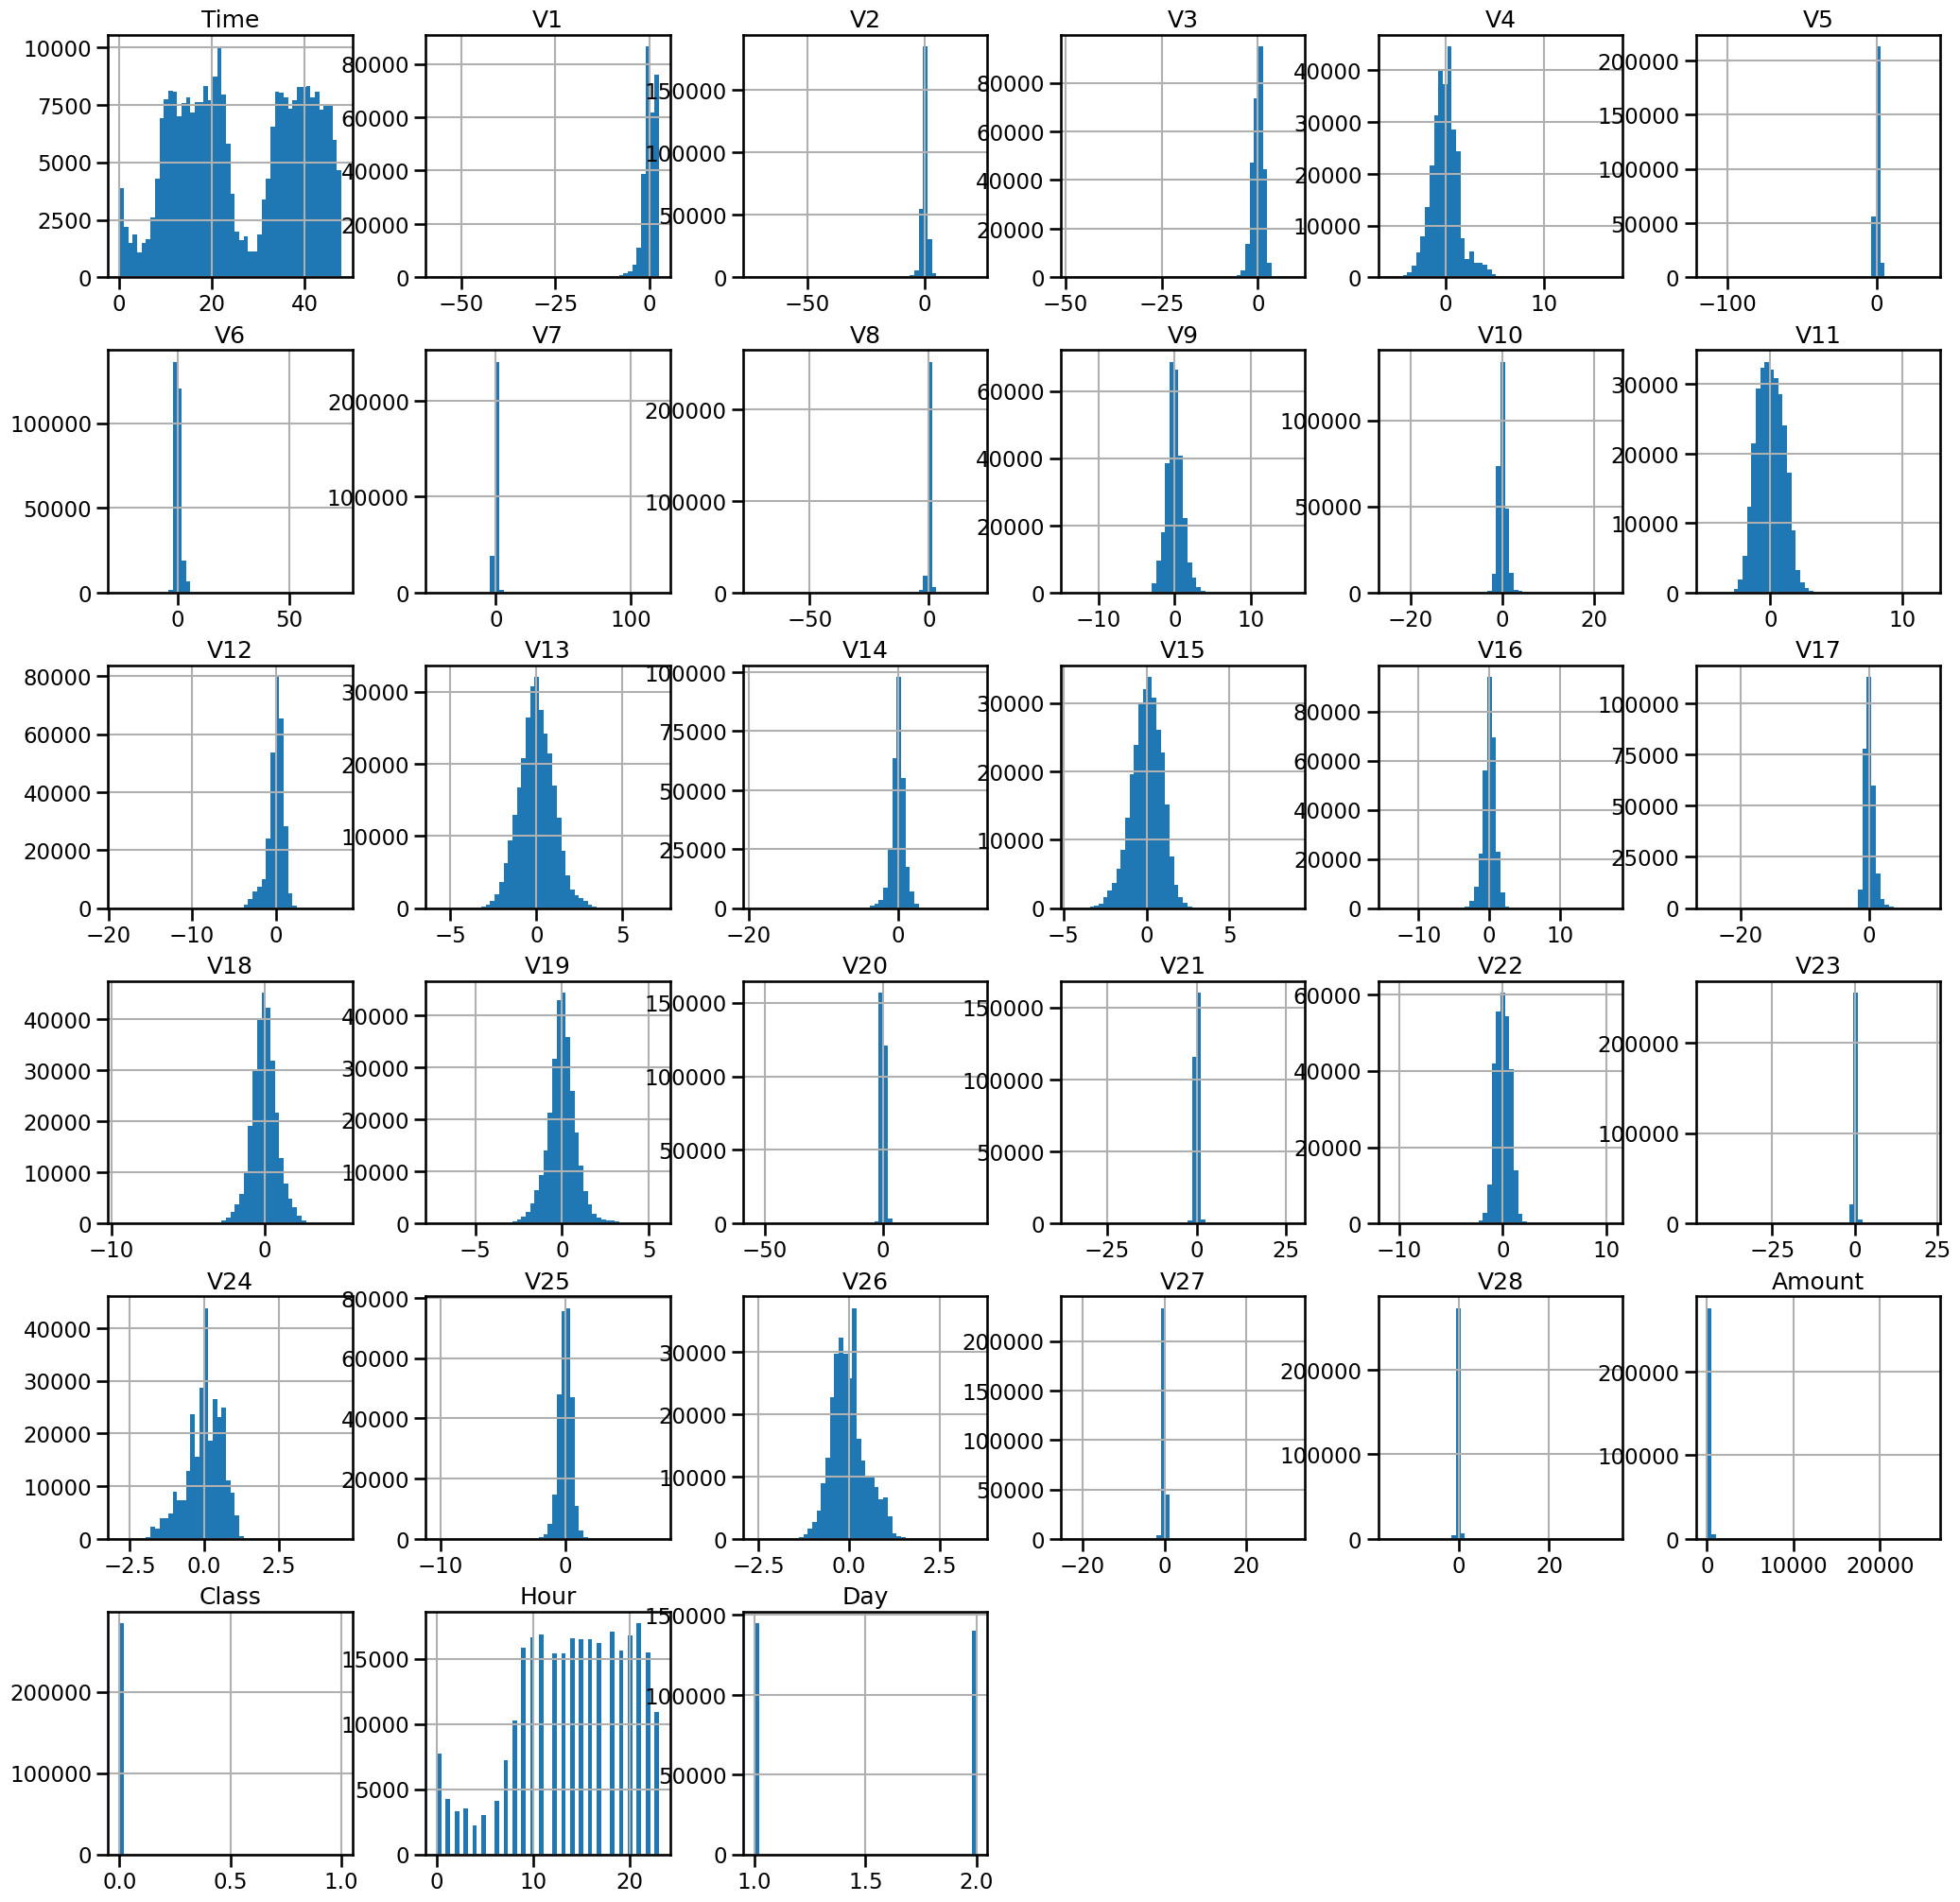

In [124]:
Data.hist(figsize = (25,25), bins=50)
plt.show()



In [125]:
Data=Data.drop(['Hour','Day'],axis=1)
Data



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,47.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,47.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,47.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,47.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


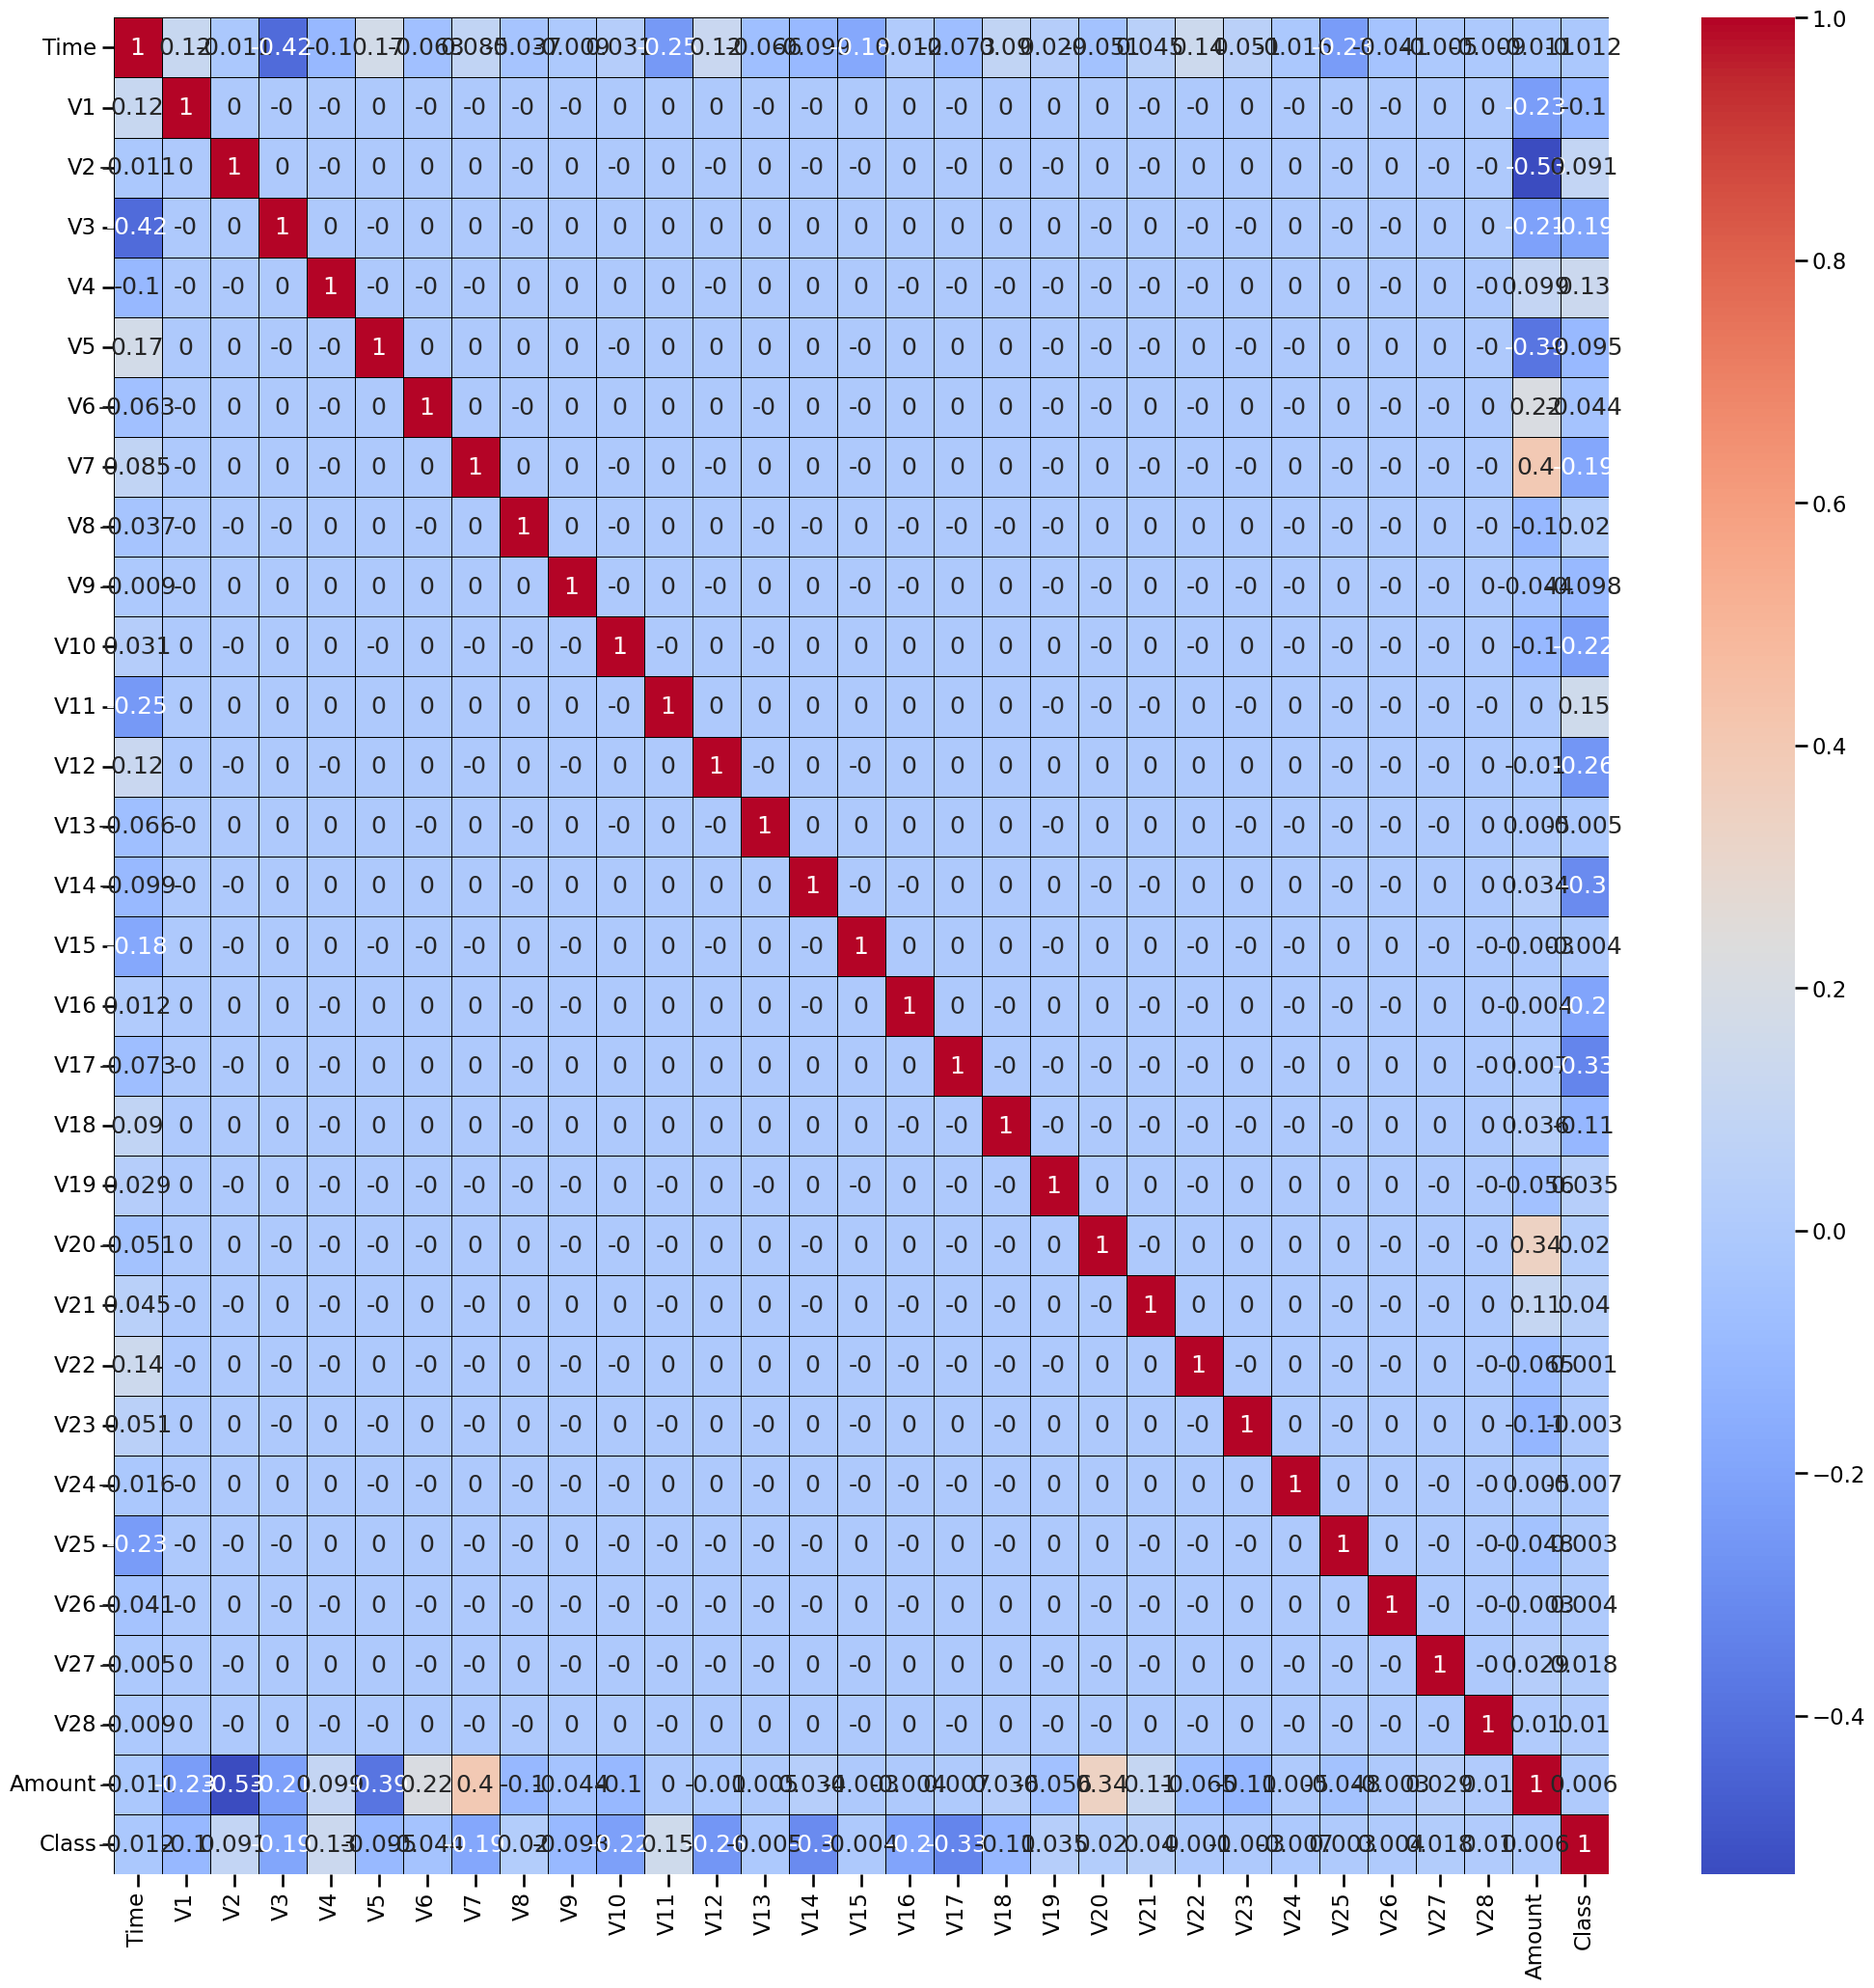

In [126]:
plt.figure(figsize=(25,25))
sns.heatmap(round(Data.corr(),3),annot = True,cmap = 'coolwarm',
            linewidths = 0.5 ,linecolor='black')# plotting correlation heatmap
plt.show()

In [127]:
Data.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

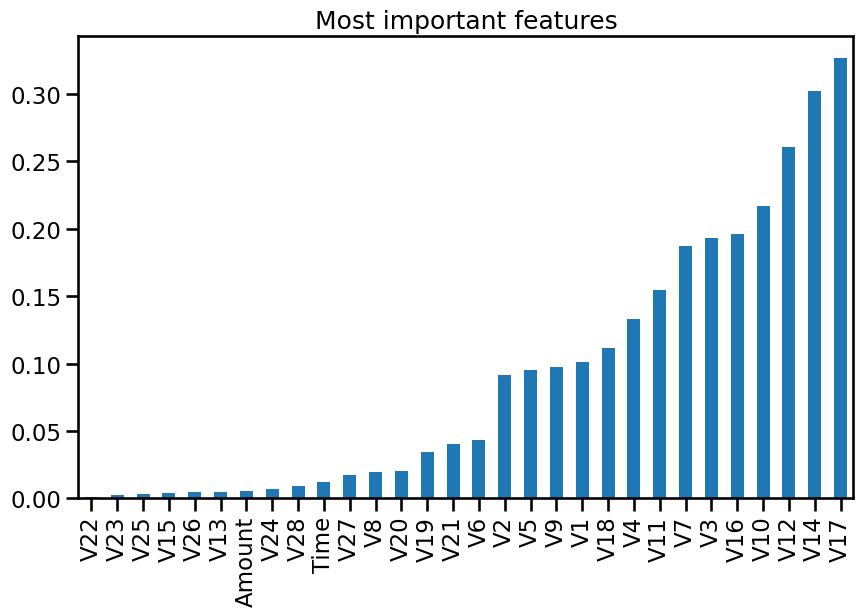

In [128]:
plt.figure(figsize=(10,6))
d = Data.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

3) DATA CLEANING - MISSING-DUPLICATES-OUTLIERS

In [129]:
genuine = Data[Data.Class == 0]
fraud = Data[Data.Class == 1]

In [130]:
Data.isnull().sum().max()

0

In [131]:
print('Number of duplicated values in dataset: ', Data.duplicated().sum())


Number of duplicated values in dataset:  1081


In [132]:
# function to dectect the range on which above or below outliers may exist
# it is done based on the metrics of boxplot
def outliers(arr):

    per25,per75 = np.percentile(arr,[25,75])
    mean = np.mean(arr)
    iqr = per75 - per25
    upper_fence = mean + 1.5*iqr
    lower_fence = mean - 1.5*iqr
    outliers_count = ((arr > upper_fence) | (arr < lower_fence)).sum()
    return upper_fence,lower_fence,outliers_count
# to find the ouliers in both Genuine & fraudulent transactions
print("Number of outliers in Legit amount transactions: ",outliers(genuine.Amount)[2])
print("Number of outliers in fraud amount transactions: ",outliers(fraud.Amount)[2])


Number of outliers in Legit amount transactions:  30081
Number of outliers in fraud amount transactions:  66


In [133]:

# using outlier func to get the range for oulier detection
genamnt_outliers = outliers(genuine.Amount)
frdamnt_outliers = outliers(fraud.Amount)
l_out = genuine[genuine.Amount <= genamnt_outliers[0]]# removing outliers
f_out = fraud[fraud.Amount <= frdamnt_outliers[0]]# removing outliers
print("genuine:\n upper fence:{} lower fence:{} ouliers count:{}"
     .format(genamnt_outliers[0],genamnt_outliers[1],genamnt_outliers[2]))
print("fradulent:\n upper fence:{} lower fence:{} ouliers count:{}"
     .format(frdamnt_outliers[0],frdamnt_outliers[1],frdamnt_outliers[2]))


genuine:
 upper fence:195.39102242231326 lower fence:-18.80897757768672 ouliers count:30081
fradulent:
 upper fence:279.5463211382114 lower fence:-35.12367886178862 ouliers count:66


In [134]:
df_aft_outliers = pd.concat([l_out,f_out])
df_aft_outliers.shape

(254660, 31)

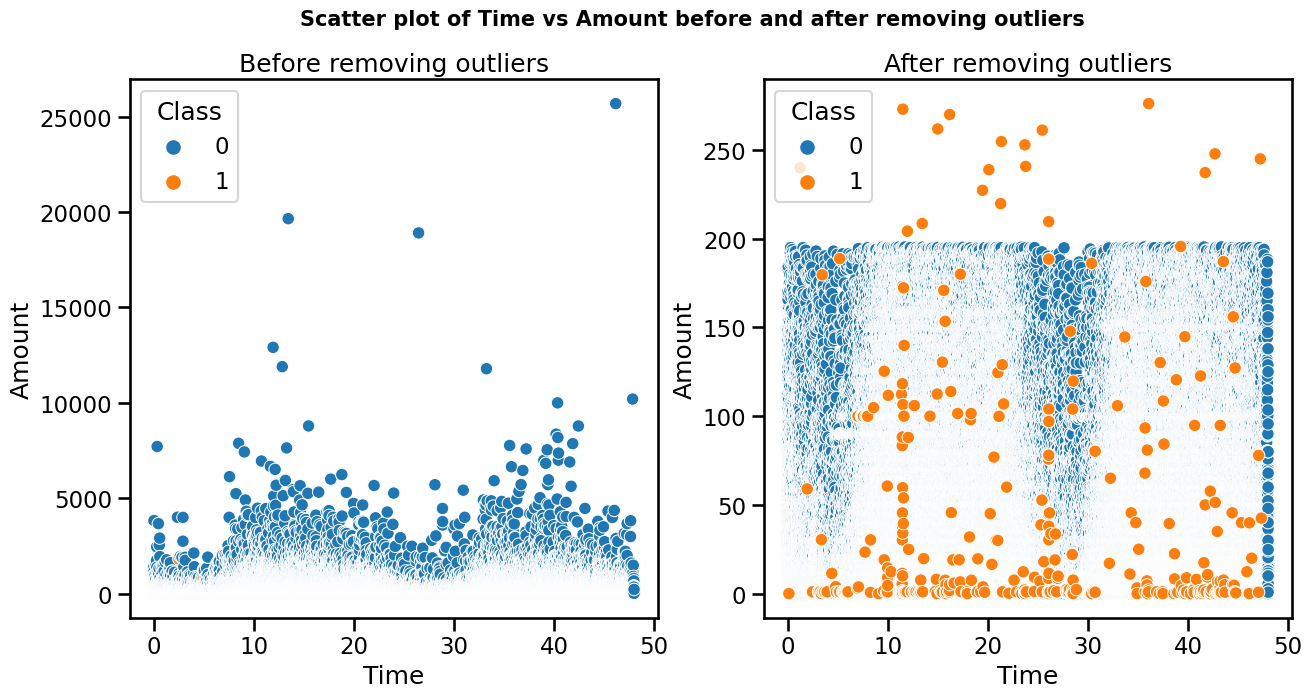

In [135]:

# Scatter plot for time vs amount
plt.figure(figsize=(15,7)) # adding fig size
plt.suptitle("Scatter plot of Time vs Amount before and after removing outliers",
             size = 15,weight = 'bold')
plt.subplot(1,2,1)
sns.scatterplot(Data,y = Data.Amount,x = Data.Time,hue = Data.Class)# including outliers
plt.title('Before removing outliers')

plt.subplot(1,2,2)
sns.scatterplot(df_aft_outliers,y = df_aft_outliers.Amount,x = df_aft_outliers.Time,
               hue = df_aft_outliers.Class)# removing outliers
plt.title("After removing outliers")
plt.show()

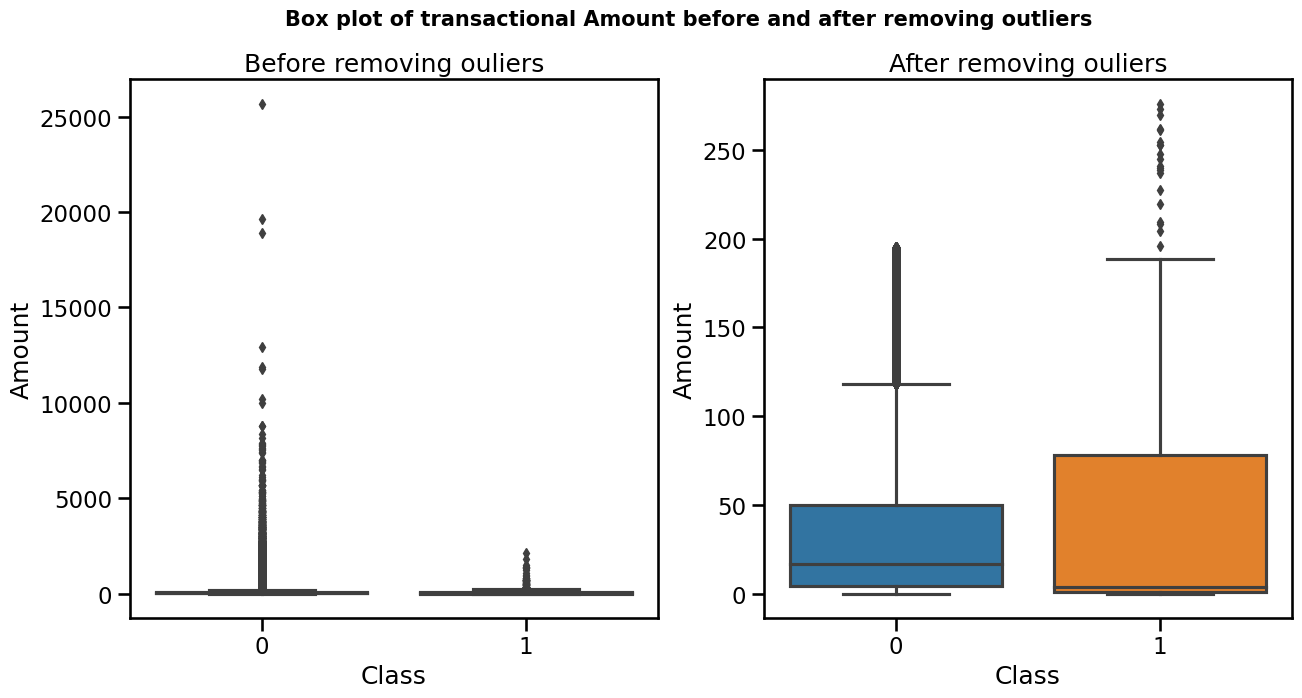

In [136]:
plt.figure(figsize = (15,7))
plt.suptitle("Box plot of transactional Amount before and after removing outliers ",
             size = 15,weight = 'bold')
plt.subplot(1,2,1)
sns.boxplot(y = Data.Amount,x = Data.Class)# including outliers
plt.title('Before removing ouliers')

plt.subplot(1,2,2)
sns.boxplot(y = df_aft_outliers.Amount,x = df_aft_outliers.Class)# after removing outliers
plt.title('After removing ouliers')
plt.show()

4) FINAL FEATURE PREPARATION (SCALING, TRANSFORMATION, SELECTION)

In [137]:
# Scale amount by log
# Adding a small amount of 0.0001 to amount as log of zero is infinite.
df_aft_outliers['Amount_log'] = np.log(df_aft_outliers.Amount + 0.0001)

[Text(0.5, 1.0, 'After Transformation'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Value')]

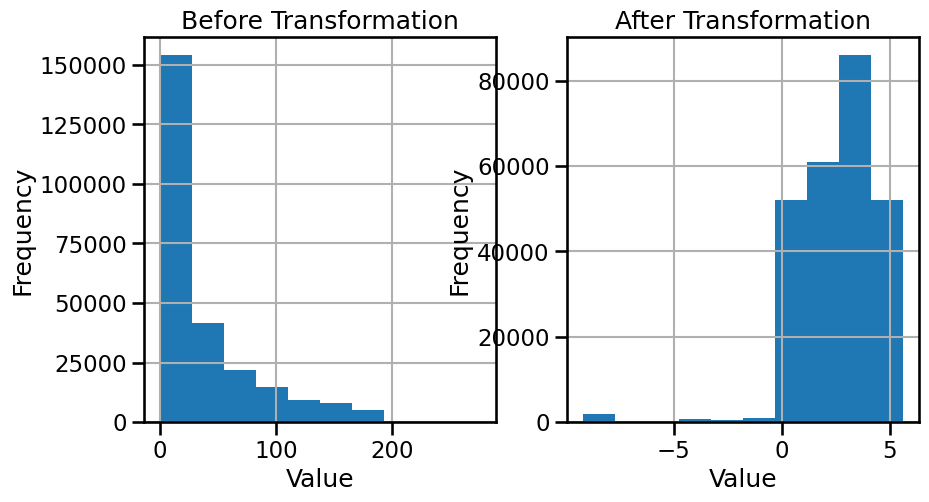

In [138]:
fig, (ax_before,ax_after)=plt.subplots(1,2, figsize=(10,5))
df_aft_outliers['Amount'].hist(ax=ax_before)
df_aft_outliers['Amount_log'].hist(ax=ax_after)

ax_before.set(title='Before Transformation', ylabel='Frequency', xlabel='Value')
ax_after.set(title='After Transformation', ylabel='Frequency', xlabel='Value')

In [139]:
X = df_aft_outliers.drop(['Time','Class','Amount'],axis=1)
y = df_aft_outliers['Class']

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(Data[['V2','V5','V9','V1','V18','V4','V11','V7','V3','V16','V10','V12','V14','V17']])
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

NameError: ignored

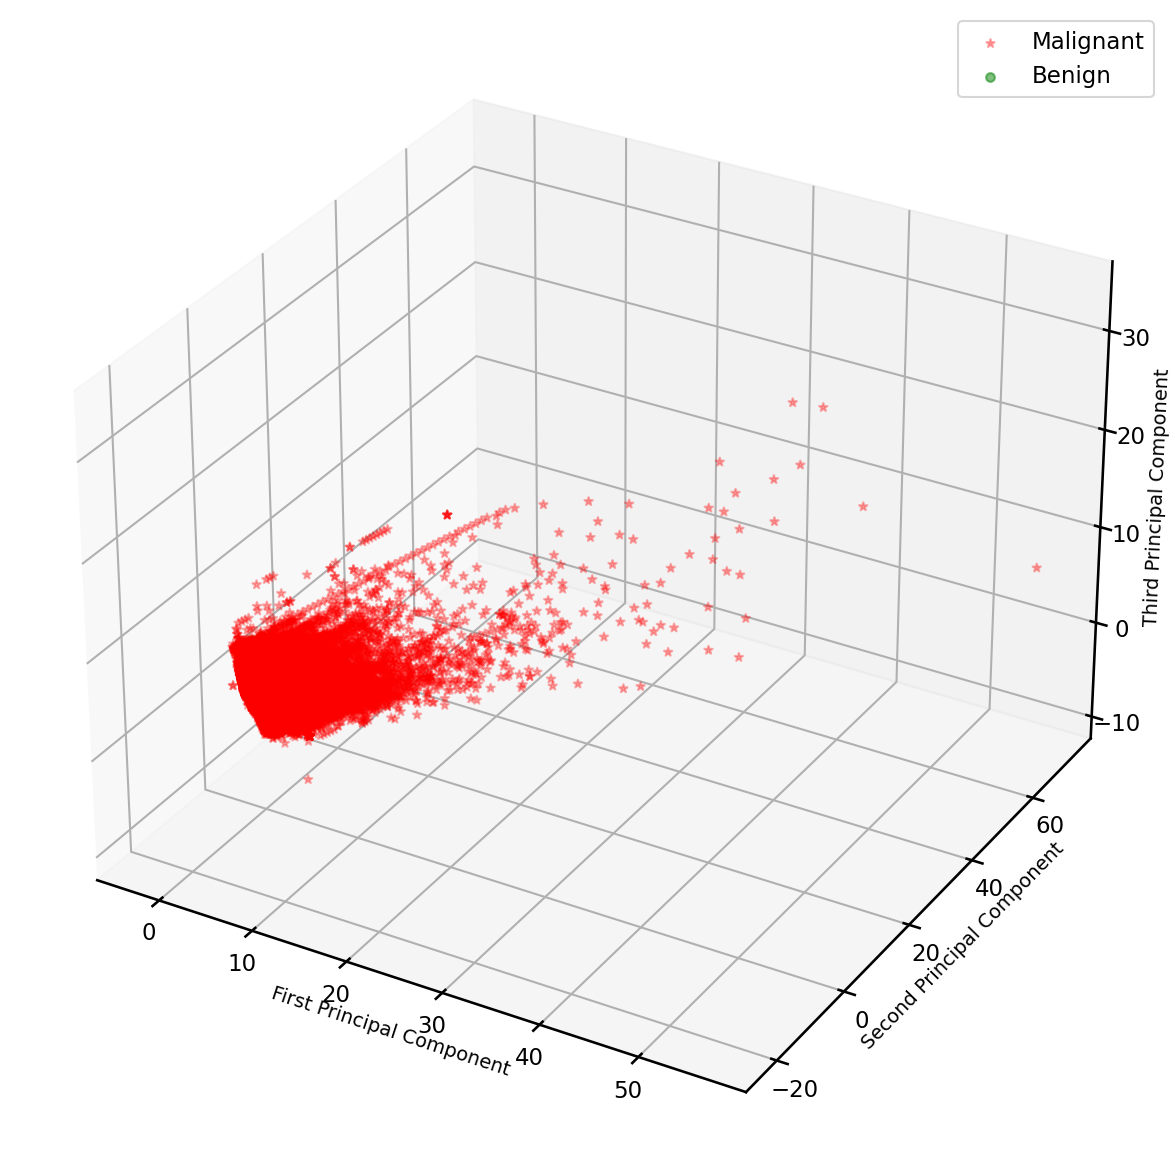

In [141]:

Xax = principalComponents[:,0]
Yax = principalComponents[:,1]
Zax = principalComponents[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()

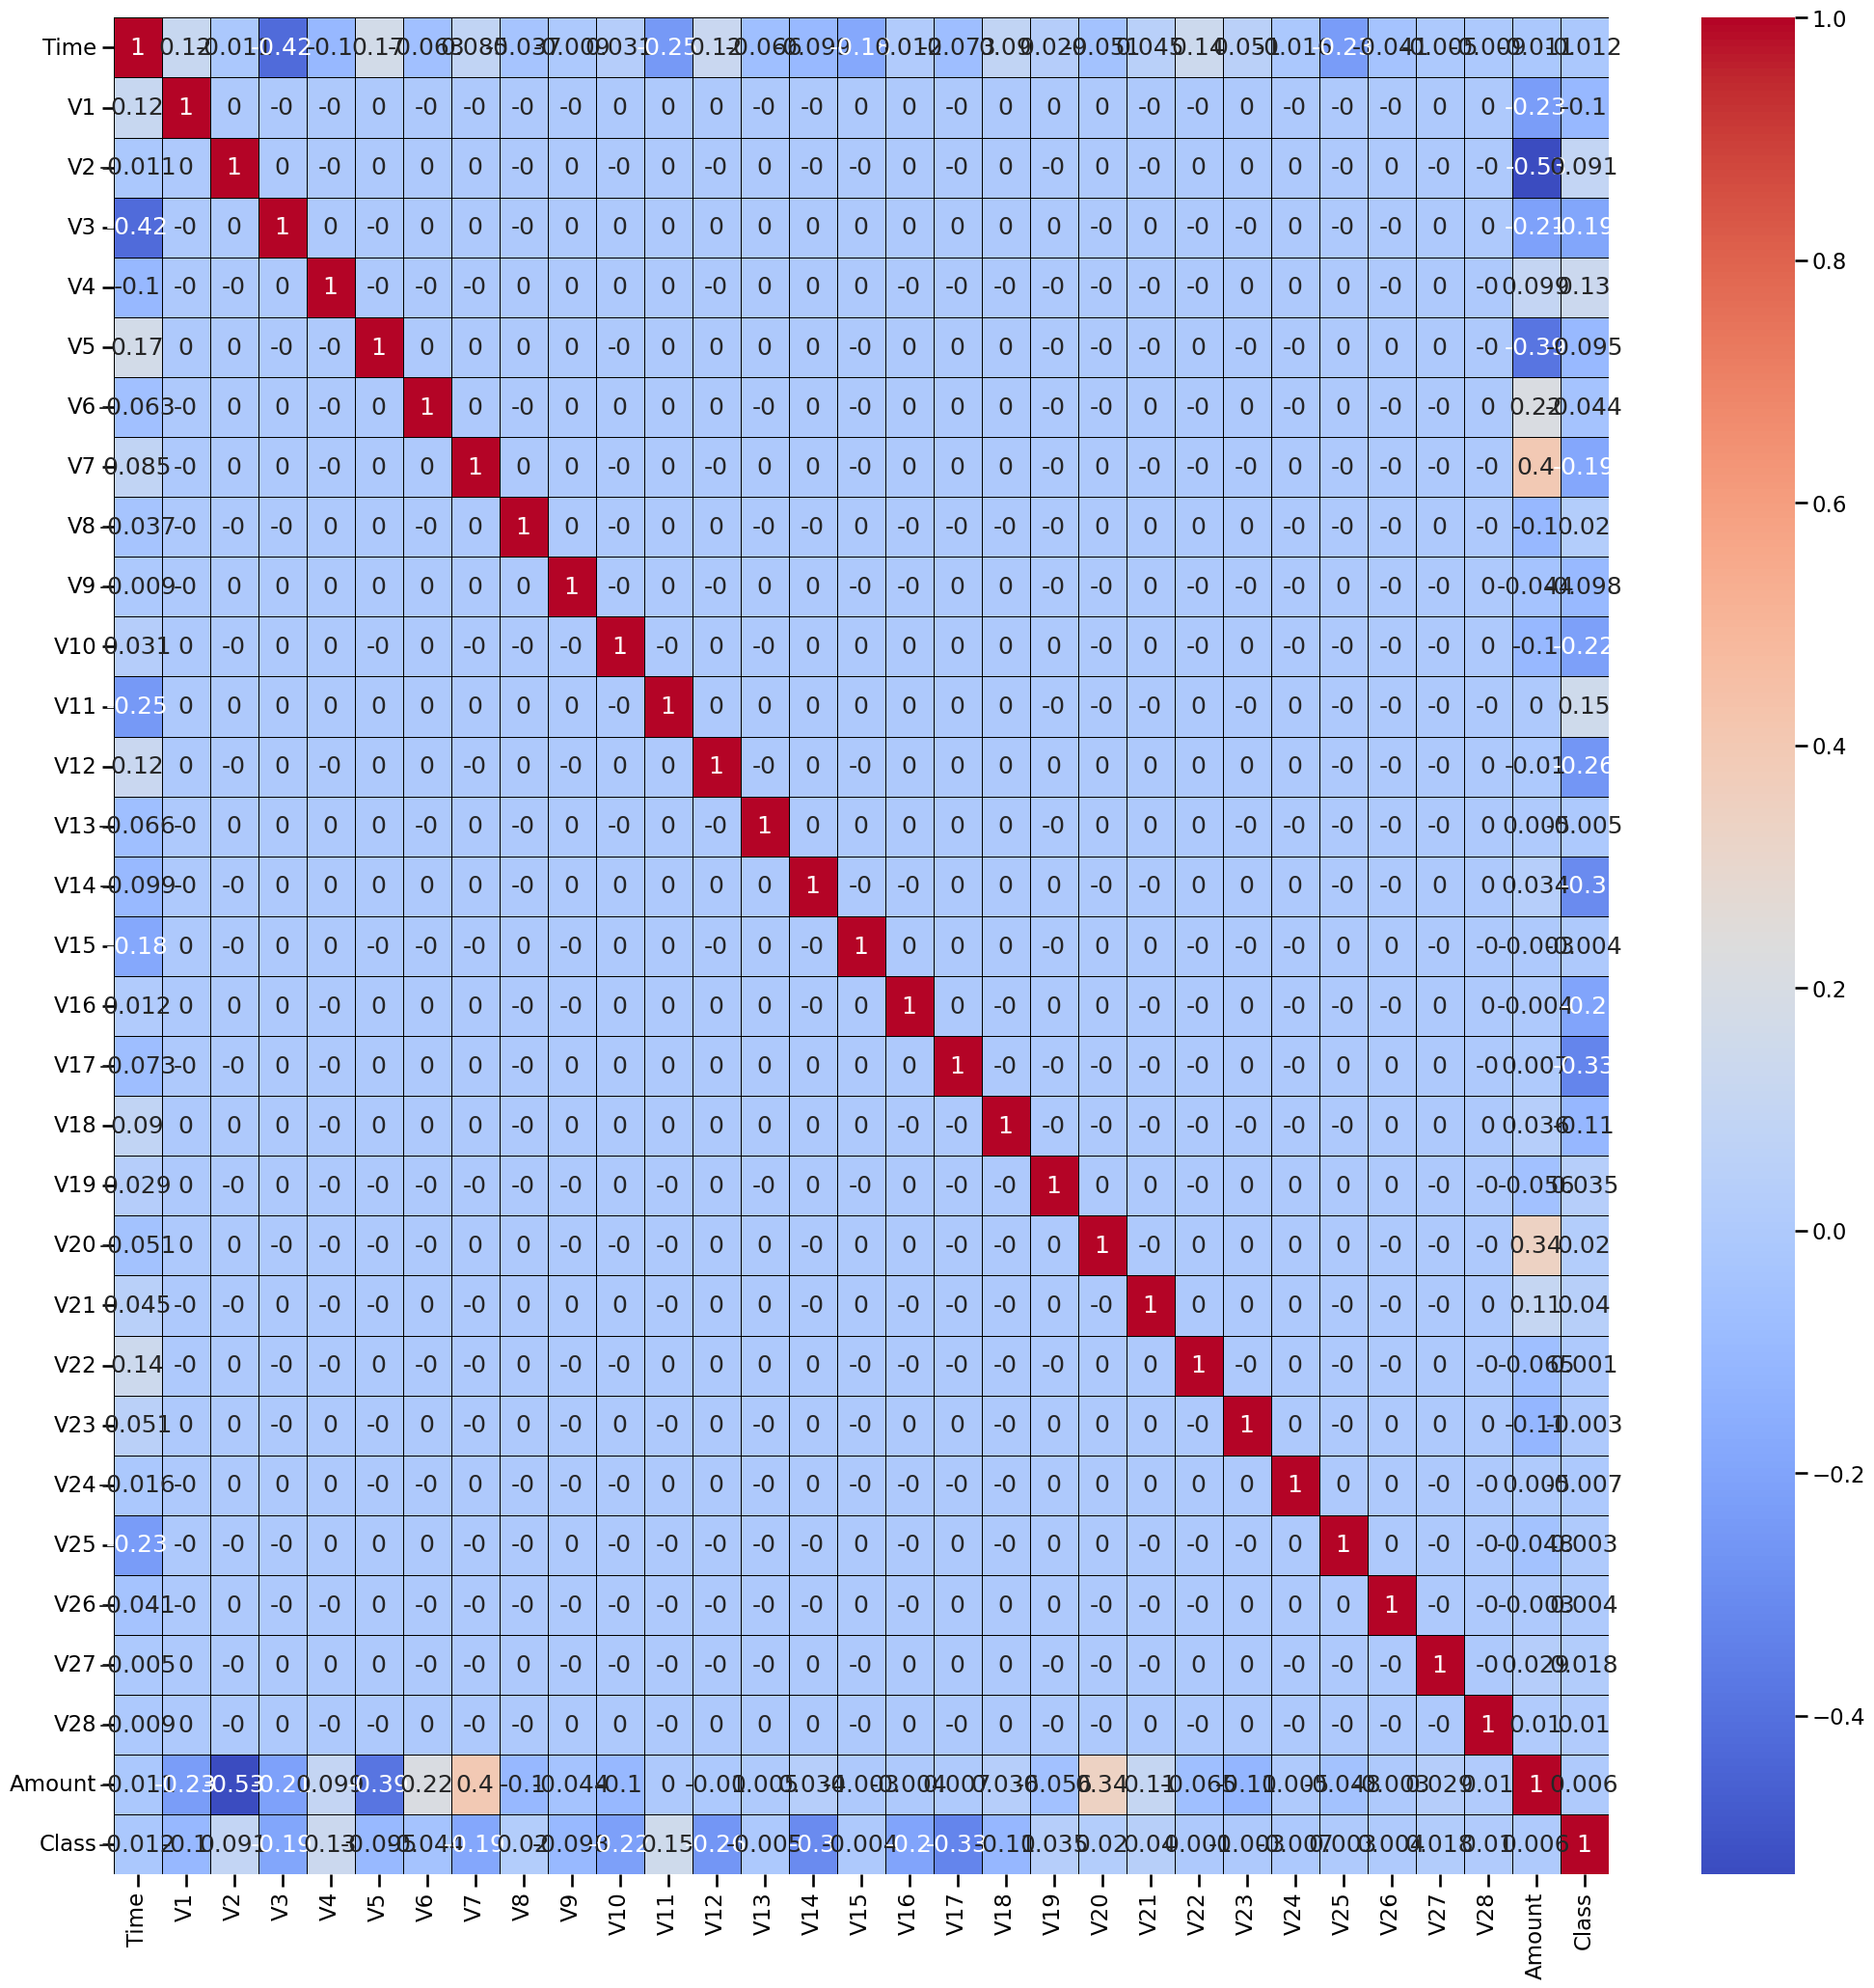

In [142]:
# correlation between all numerical features
plt.figure(figsize=(25,25))
sns.heatmap(round(Data.corr(),3),annot = True,cmap = 'coolwarm',
            linewidths = 0.5 ,linecolor='black')# plotting correlation heatmap
plt.show()

In [143]:
y.value_counts()

0    254234
1       426
Name: Class, dtype: int64

In [144]:
from imblearn.under_sampling import NearMiss
import numpy as np


sampler = NearMiss(version=3, sampling_strategy={0: 7000})

Xs,ys = sampler.fit_resample(X,y)
ys.value_counts()

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


1    426
0    338
Name: Class, dtype: int64

In [145]:
from imblearn.under_sampling import RandomUnderSampler

sampler2 = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
Xs1,ys1 = sampler2.fit_resample(X,y)
ys1.value_counts()

0    4260
1     426
Name: Class, dtype: int64

In [146]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'minority')
Xs,ys = sm.fit_resample(Xs1,ys1)
ys.value_counts()

0    4260
1    4260
Name: Class, dtype: int64

In [147]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(Xs,ys,test_size = 0.20,stratify = ys,
                                       random_state = 0)
print(X_train.shape,X_test.shape)

(6816, 29) (1704, 29)


In [148]:
def get_correlation(X_test, y_test,models):
    #This function calculates the average correlation between predictors
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})

    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test.to_numpy())

    corr=predictions.corr()
    print("Average correlation between predictors: ", corr.mean().mean()-1/n_estimators)
    return corr



In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.get_params().keys()

param_grid = {'n_estimators': [20,40,70,100,130],
             'max_depth' : [5,10,15,20],
             'max_features':["auto", "sqrt", "log2"]}

search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)


search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.9881160670678574

In [150]:
search.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}

In [151]:
from sklearn.metrics import accuracy_score

best_estimator=search.best_estimator_
    # Fit the best estimator on the training data
best_estimator.fit(X_train, y_train)

    # Make predictions on the test data
y_pred = best_estimator.predict(X_test)

    # Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)


print(accuracy)

0.988849765258216


In [152]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
cr = classification_report(y_test, y_pred)
print(cr)
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))
print(score_df)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       852
           1       0.99      0.99      0.99       852

    accuracy                           0.99      1704
   macro avg       0.99      0.99      0.99      1704
weighted avg       0.99      0.99      0.99      1704

   accuracy  precision    recall        f1      auc
0   0.98885   0.989424  0.988263  0.988843  0.98885


Text(0.5, 86.0833333333333, 'Ground Truth')

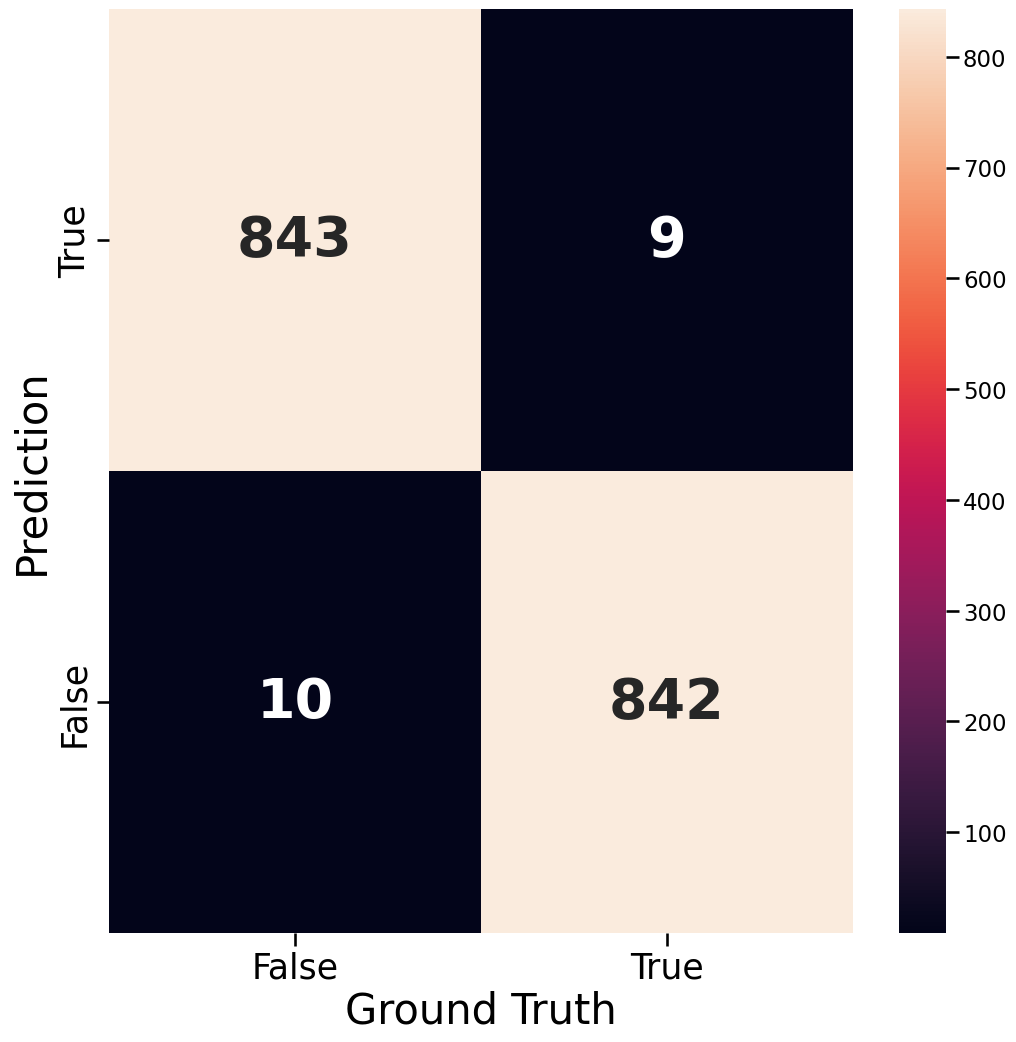

In [153]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)


In [154]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

x_train=X_train
x_test=X_test
# Assuming you have the required data: x_train, y_train, x_test, y_test

# Define the models
svm_model = SVC()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gradientboost_model = GradientBoostingClassifier()
logistic_regression = LogisticRegression()

# Define the hyperparameters grid for optimization
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_param_grid = {'n_estimators': [20,40,70,100,130],
             'max_depth' : [5,10,15,20],
             'max_features':["auto", "sqrt", "log2"]}

adaboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1]
}

gradientboost_param_grid = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [5, 10, 15,20]
}

# Create GridSearchCV objects for each model
svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=3)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3)
adaboost_grid = GridSearchCV(estimator=adaboost_model, param_grid=adaboost_param_grid, cv=3)
gradientboost_grid = GridSearchCV(estimator=gradientboost_model, param_grid=gradientboost_param_grid, cv=3)

# Fit the GridSearchCV objects to the training data
svm_grid.fit(x_train, y_train)
rf_grid.fit(x_train, y_train)
adaboost_grid.fit(x_train, y_train)
gradientboost_grid.fit(x_train, y_train)

# Get the best models and their hyperparameters
best_svm_model = svm_grid.best_estimator_
best_rf_model = rf_grid.best_estimator_
best_adaboost_model = adaboost_grid.best_estimator_
best_gradientboost_model = gradientboost_grid.best_estimator_

# Evaluate the best models on the test data
svm_predictions = best_svm_model.predict(x_test)
rf_predictions = best_rf_model.predict(x_test)
adaboost_predictions = best_adaboost_model.predict(x_test)
gradientboost_predictions = best_gradientboost_model.predict(x_test)

print('SVM Accuracy:', accuracy_score(y_test, svm_predictions))
print('Random Forest Accuracy:', accuracy_score(y_test, rf_predictions))
print('AdaBoost Accuracy:', accuracy_score(y_test, adaboost_predictions))
print('Gradient Boosting Accuracy:', accuracy_score(y_test, gradientboost_predictions))

print('SVM Precision:', precision_score(y_test, svm_predictions, average='weighted'))
print('Random Forest Precision:', precision_score(y_test, rf_predictions, average='weighted'))
print('AdaBoost Precision:', precision_score(y_test, adaboost_predictions, average='weighted'))
print('Gradient Boosting Precision:', precision_score(y_test, gradientboost_predictions, average='weighted'))

print('SVM Recall:', recall_score(y_test, svm_predictions, average='weighted'))
print('Random Forest Recall:', recall_score(y_test, rf_predictions, average='weighted'))
print('AdaBoost Recall:', recall_score(y_test, adaboost_predictions, average='weighted'))
print('Gradient Boosting Recall:', recall_score(y_test, gradientboost_predictions, average='weighted'))

print('SVM F1 Score:', f1_score(y_test, svm_predictions, average='weighted'))
print('Random Forest F1 Score:', f1_score(y_test, rf_predictions, average='weighted'))
print('AdaBoost F1 Score:', f1_score(y_test, adaboost_predictions, average='weighted'))
print('Gradient Boosting F1 Score:', f1_score(y_test, gradientboost_predictions, average='weighted'))

print('SVM Classification Report:\n', classification_report(y_test, svm_predictions))
print('Random Forest Classification Report:\n', classification_report(y_test, rf_predictions))
print('AdaBoost Classification Report:\n', classification_report(y_test, adaboost_predictions))
print('Gradient Boosting Classification Report:\n', classification_report(y_test, gradientboost_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

SVM Accuracy: 0.9929577464788732
Random Forest Accuracy: 0.9876760563380281
AdaBoost Accuracy: 0.9847417840375586
Gradient Boosting Accuracy: 0.9906103286384976
SVM Precision: 0.9930256653311362
Random Forest Precision: 0.9877304797450619
AdaBoost Precision: 0.9847444551591128
Gradient Boosting Precision: 0.9906211426556162
SVM Recall: 0.9929577464788732
Random Forest Recall: 0.9876760563380281
AdaBoost Recall: 0.9847417840375586
Gradient Boosting Recall: 0.9906103286384976
SVM F1 Score: 0.9929575039366064
Random Forest F1 Score: 0.9876757125366149
AdaBoost F1 Score: 0.9847417630179237
Gradient Boosting F1 Score: 0.9906102768976442
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       852
           1       0.99      1.00      0.99       852

    accuracy                           0.99      1704
   macro avg       0.99      0.99      0.99      1704
weighted avg       0.99      0.99      0.99      1704

Rando

In [155]:
print('SVM Accuracy:', accuracy_score(y_test, svm_predictions))
print('Random Forest Accuracy:', accuracy_score(y_test, rf_predictions))
print('AdaBoost Accuracy:', accuracy_score(y_test, adaboost_predictions))
print('Gradient Boosting Accuracy:', accuracy_score(y_test, gradientboost_predictions))

print('SVM Precision:', precision_score(y_test, svm_predictions, average='weighted'))
print('Random Forest Precision:', precision_score(y_test, rf_predictions, average='weighted'))
print('AdaBoost Precision:', precision_score(y_test, adaboost_predictions, average='weighted'))
print('Gradient Boosting Precision:', precision_score(y_test, gradientboost_predictions, average='weighted'))

print('SVM Recall:', recall_score(y_test, svm_predictions, average='weighted'))
print('Random Forest Recall:', recall_score(y_test, rf_predictions, average='weighted'))
print('AdaBoost Recall:', recall_score(y_test, adaboost_predictions, average='weighted'))
print('Gradient Boosting Recall:', recall_score(y_test, gradientboost_predictions, average='weighted'))

print('SVM F1 Score:', f1_score(y_test, svm_predictions, average='weighted'))
print('Random Forest F1 Score:', f1_score(y_test, rf_predictions, average='weighted'))
print('AdaBoost F1 Score:', f1_score(y_test, adaboost_predictions, average='weighted'))
print('Gradient Boosting F1 Score:', f1_score(y_test, gradientboost_predictions, average='weighted'))

print('SVM Classification Report:\n', classification_report(y_test, svm_predictions))
print('Random Forest Classification Report:\n', classification_report(y_test, rf_predictions))
print('AdaBoost Classification Report:\n', classification_report(y_test, adaboost_predictions))
print('Gradient Boosting Classification Report:\n', classification_report(y_test, gradientboost_predictions))


SVM Accuracy: 0.9929577464788732
Random Forest Accuracy: 0.9876760563380281
AdaBoost Accuracy: 0.9847417840375586
Gradient Boosting Accuracy: 0.9906103286384976
SVM Precision: 0.9930256653311362
Random Forest Precision: 0.9877304797450619
AdaBoost Precision: 0.9847444551591128
Gradient Boosting Precision: 0.9906211426556162
SVM Recall: 0.9929577464788732
Random Forest Recall: 0.9876760563380281
AdaBoost Recall: 0.9847417840375586
Gradient Boosting Recall: 0.9906103286384976
SVM F1 Score: 0.9929575039366064
Random Forest F1 Score: 0.9876757125366149
AdaBoost F1 Score: 0.9847417630179237
Gradient Boosting F1 Score: 0.9906102768976442
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       852
           1       0.99      1.00      0.99       852

    accuracy                           0.99      1704
   macro avg       0.99      0.99      0.99      1704
weighted avg       0.99      0.99      0.99      1704

Rando

In [156]:
# Use stacking with Logistic Regression as the final estimator
estimators = [
    ('svm', best_svm_model),
    ('rf', best_rf_model),
    ('adaboost', best_adaboost_model),
    ('gradientboost', best_gradientboost_model)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=logistic_regression)

# Fit the stacking model to the training data
stacking_model.fit(x_train, y_train)

# Evaluate the stacking model on the test data
stacking_predictions = stacking_model.predict(x_test)

print('Stacking Accuracy:', accuracy_score(y_test, stacking_predictions))
print('Stacking Precision:', precision_score(y_test, stacking_predictions, average='weighted'))
print('Stacking Recall:', recall_score(y_test, stacking_predictions, average='weighted'))
print('Stacking F1 Score:', f1_score(y_test, stacking_predictions, average='weighted'))
print('Stacking Classification Report:\n', classification_report(y_test, stacking_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Stacking Accuracy: 0.9923708920187794
Stacking Precision: 0.9923878497655946
Stacking Recall: 0.9923708920187794
Stacking F1 Score: 0.9923708263319456
Stacking Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       852
           1       0.99      1.00      0.99       852

    accuracy                           0.99      1704
   macro avg       0.99      0.99      0.99      1704
weighted avg       0.99      0.99      0.99      1704



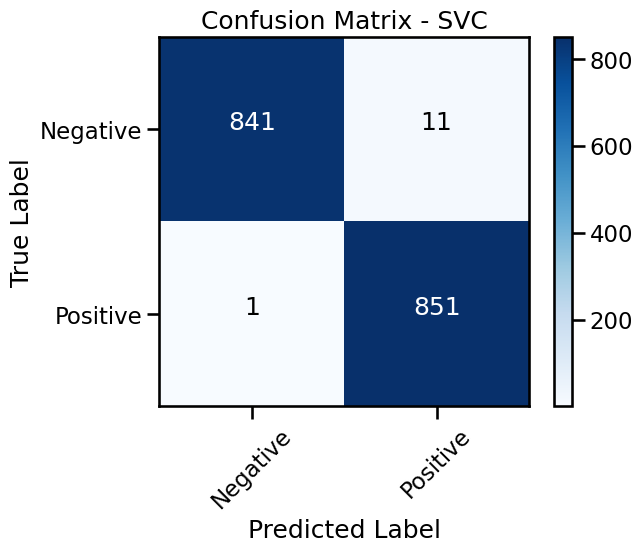

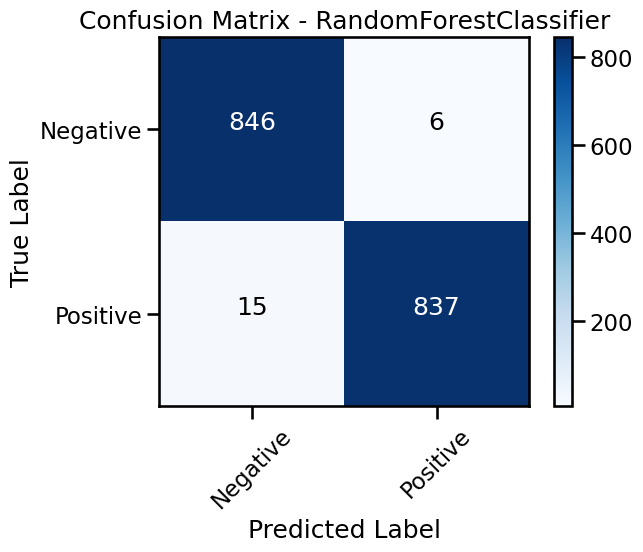

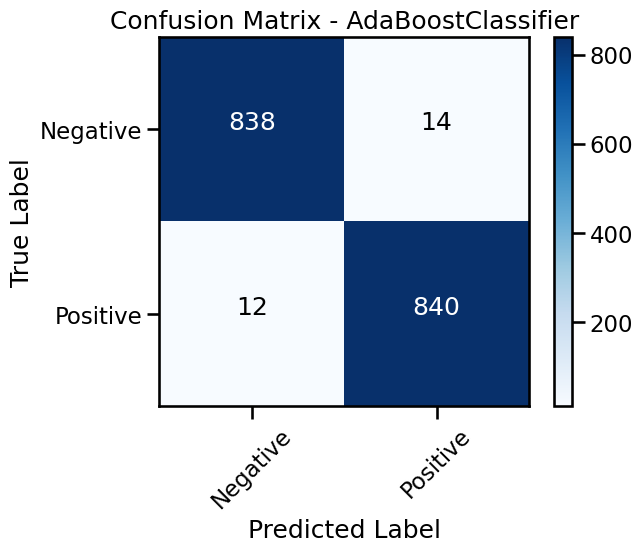

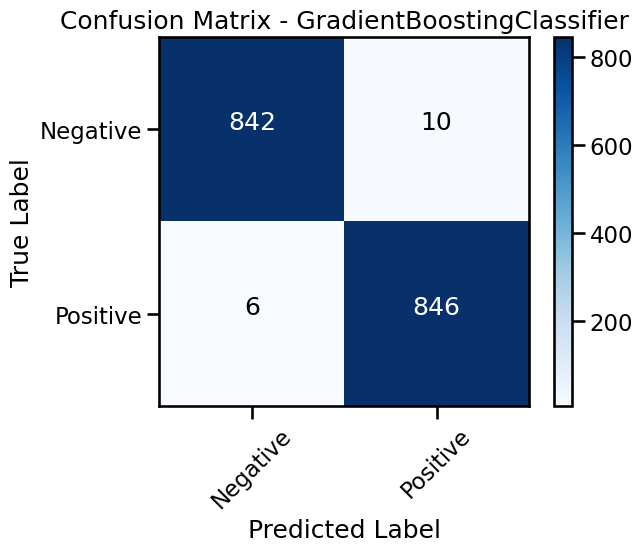

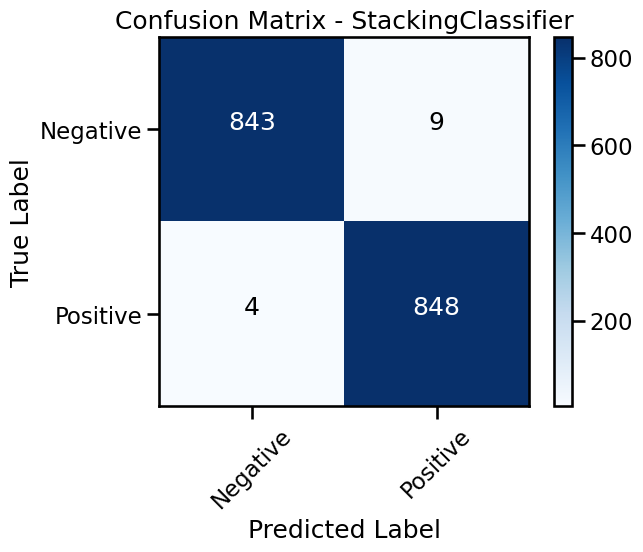

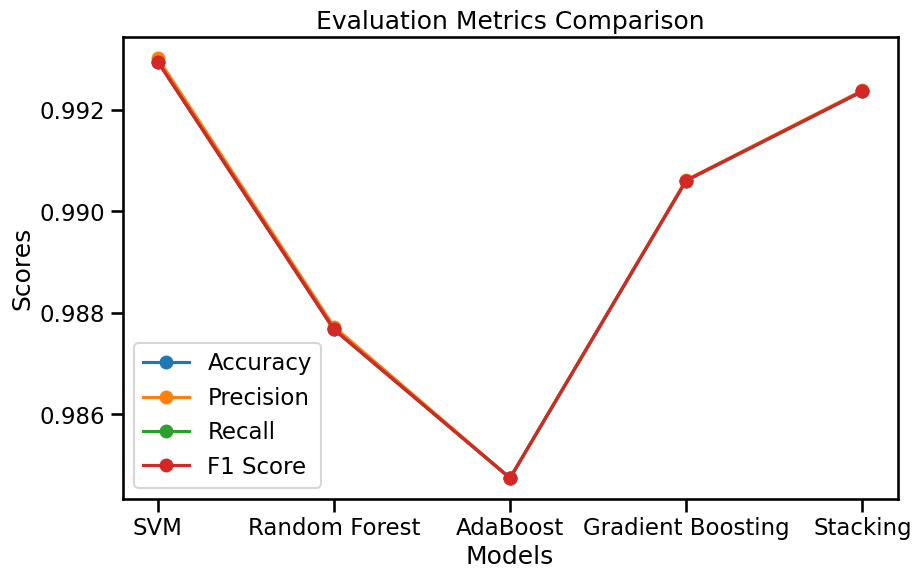

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define a list of model names for labeling the plots
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking']

# Define empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Evaluate and plot metrics for each model
models = [best_svm_model, best_rf_model, best_adaboost_model, best_gradientboost_model, stacking_model]
class_names = ["Negative", "Positive"]
for model in models:
    # Evaluate the model
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')


    # Store the evaluation scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)


    # Plot confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - ' + model.__class__.__name__)
    plt.colorbar()
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
    plt.yticks(np.arange(len(class_names)), class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add numbers in each box
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()

# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', label='Accuracy')
plt.plot(model_names, precision_scores, marker='o', label='Precision')
plt.plot(model_names, recall_scores, marker='o', label='Recall')
plt.plot(model_names, f1_scores, marker='o', label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison')
plt.legend()
plt.show()

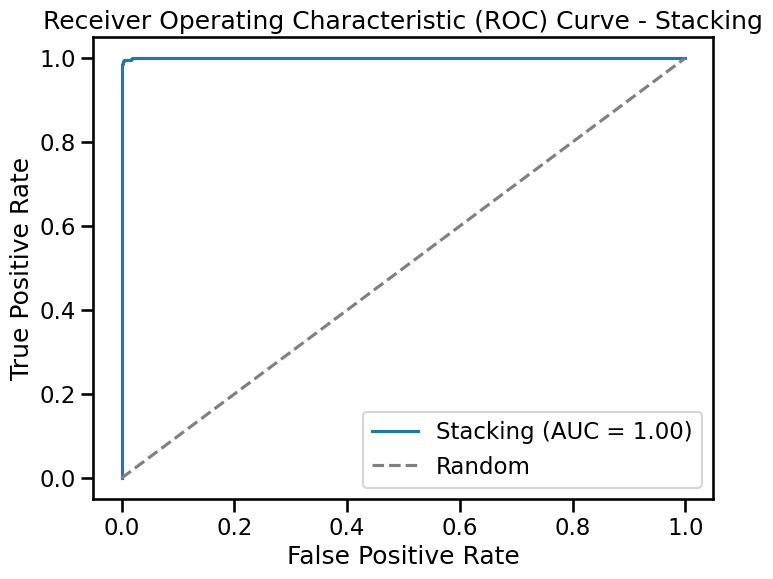

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for stacking model
stacking_fpr, stacking_tpr, stacking_thresholds = roc_curve(y_test, stacking_model.predict_proba(x_test)[:, 1])
stacking_roc_auc = auc(stacking_fpr, stacking_tpr)

# Plot ROC curve for stacking model
plt.figure(figsize=(8, 6))
plt.plot(stacking_fpr, stacking_tpr, label='Stacking (AUC = {:.2f})'.format(stacking_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Stacking')
plt.legend()
plt.show()